# Homework 6 (Solution)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import f1_score

## Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.
But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Fill missing values with zeros.
* Apply the log transform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [2]:
# data 
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

print('# rows: ' +  str(len(df)))

# keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'
df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]

print('# rows after subset: ' +  str(len(df)))

# rows: 20640
# rows after subset: 15687


In [3]:
# only include the columns specified above
df = df.drop('ocean_proximity', axis = 1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,15687.0,-119.217442,1.780380,-124.1400,-121.0700,-118.3700,-117.9900,-114.3100
latitude,15687.0,35.467307,2.066387,32.6100,33.9400,34.1600,37.3400,41.9500
housing_median_age,15687.0,27.188118,12.057128,1.0000,17.0000,27.0000,36.0000,52.0000
total_rooms,15687.0,2665.677312,2257.672743,2.0000,1441.0000,2118.0000,3172.0000,39320.0000
total_bedrooms,15530.0,541.244688,435.650018,2.0000,295.0000,432.0000,645.0000,6445.0000
population,15687.0,1466.317205,1180.389908,3.0000,802.0000,1195.0000,1777.0000,35682.0000
households,15687.0,500.916491,392.759399,2.0000,278.0000,406.0000,602.0000,6082.0000
median_income,15687.0,3.804019,1.857158,0.4999,2.5208,3.4688,4.6862,15.0001
median_house_value,15687.0,191943.020017,108801.077620,14999.0000,111300.0000,166900.0000,241100.0000,500001.0000


In [5]:
# log transformation for median house value
y = np.log1p(df.median_house_value)

# remove y from x
df_X = df.drop("median_house_value", axis=1)

In [6]:
# Fill in the missing values of the selected features with 0
df_X = df_X.fillna(0)

In [7]:
# split data into training (60%), validating (20%), and test (20%) sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

len(df) == (len(X_train) + len(X_val) + len(X_test))

True

In [8]:
#Vectorizer
train_dicts = X_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
X_train2 = dv.fit_transform(train_dicts)

val_dicts = X_val.to_dict(orient='records')
X_val2 = dv.transform(val_dicts)

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity`
* `total_rooms`
* `latitude`
* `population`

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [27]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [28]:
print(export_text(dt, feature_names=dv.feature_names_))

|--- total_rooms <= 3.66
|   |--- value: [11.72]
|--- total_rooms >  3.66
|   |--- value: [12.37]



## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)

What's the RMSE of this model on validation?

* 0.045
* 0.245
* 0.545
* 0.845

In [29]:
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

y_predict_val = rfr.predict(X_val)

In [30]:
from sklearn.metrics import mean_squared_error

# MSE
np.sqrt(mean_squared_error(y_val, y_predict_val))
     

0.2458747861034814

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for retrieving the answer.

- 10
- 25
- 50
- 160


In [31]:
n_est = np.arange(10,200,10)
mse = []

for item in n_est:
    rfr = RandomForestRegressor(n_estimators=item, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)
    y_predict_val = rfr.predict(X_val)
    mse.append(np.sqrt(mean_squared_error(y_val, y_predict_val)))


Text(0.5, 1.0, 'MSE for each value of N_estimators')

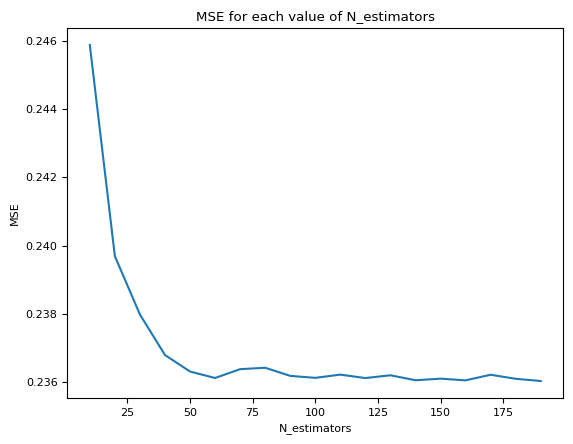

In [35]:
plt.plot(n_est, mse)
#plt.vlines(0.44, 0.45, 0.9, color='grey', linestyle='--', alpha=0.5)
plt.ylabel('MSE')
plt.xlabel('N_estimators')
plt.title('MSE for each value of N_estimators')

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25


In [38]:
n_est = np.arange(10,200,10)
max_d_val = [10, 15, 20, 25]
mse_avg = []

for val in max_d_val:
    mse = []
    for item in n_est:
        rfr = RandomForestRegressor(n_estimators=item, random_state=1, n_jobs=-1, max_depth=val)
        rfr.fit(X_train, y_train)
        y_predict_val = rfr.predict(X_val)
        mse.append(np.sqrt(mean_squared_error(y_val, y_predict_val)))
    mse_avg.append(np.mean(mse))


In [39]:
mse_avg, max_d_val

([0.24490863441377186,
  0.23812825974054477,
  0.23731268260747085,
  0.2370962703061579],
 [10, 15, 20, 25])

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `total_rooms`
* `median_income`
* `total_bedrooms`
* `longitude`


In [40]:
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1, max_depth=20)
rfr.fit(X_train, y_train)
y_predict_val = rfr.predict(X_val)

In [41]:
rfr.feature_importances_

array([0.19990871, 0.20934417, 0.03114167, 0.02051381, 0.01340811,
       0.02527238, 0.01274098, 0.48767017])

In [42]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.feature_names_
df_importances['importance'] = rfr.feature_importances_
df_importances

,feature,importance
0,households,0.199909
1,housing_median_age,0.209344
2,latitude,0.031142
3,longitude,0.020514
4,median_income,0.013408
5,population,0.025272
6,total_bedrooms,0.012741
7,total_rooms,0.487670


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value


In [43]:
import re
import xgboost as xgb

#@ CREATING THE DMARTIX:
features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)


In [44]:
#@ INITIALIZATION:
watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

In [45]:
#@ DEFINING THE FUNCTION:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results
     

In [47]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [48]:
# STORING:
scores['eta=0.3'] = parse_xgb_output(output)

In [49]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5, evals=watchlist)

In [50]:
#@ STORING:
scores['eta=0.1'] = parse_xgb_output(output)

/Users/connie/.pyenv/versions/3.7.5/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/connie/.pyenv/versions/3.7.5/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/connie/.pyenv/versions/3.7.5/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


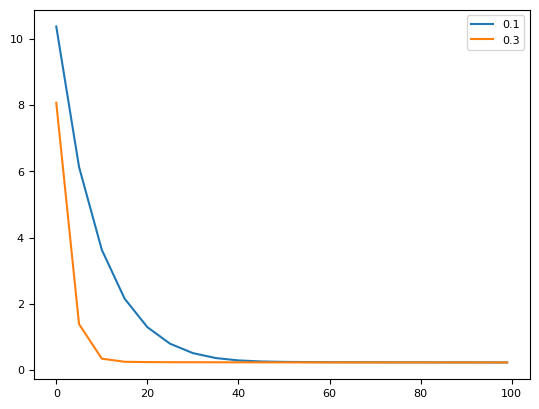

In [51]:
#@ INSPECTION:
plt.plot(scores['eta=0.1'].num_iter, scores['eta=0.1'].val_auc,
        label='0.1')
plt.plot(scores['eta=0.3'].num_iter, scores['eta=0.3'].val_auc,
        label='0.3')
plt.legend()
plt.show()